# Python e API


#### Pegar a Cotação Atual de Todas as Moedas 

In [2]:
import requests
import json

cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all')
cotacoes_dic = cotacoes.json()
print(cotacoes_dic)


{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '5.3077', 'low': '5.2481', 'varBid': '-0.0464', 'pctChange': '-0.88', 'bid': '5.2488', 'ask': '5.2513', 'timestamp': '1717693926', 'create_date': '2024-06-06 14:12:06'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '5.33', 'low': '5.275', 'varBid': '-0.05', 'pctChange': '-0.94', 'bid': '5.12', 'ask': '5.43', 'timestamp': '1717693380', 'create_date': '2024-06-06 14:03:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.8769', 'low': '3.8351', 'varBid': '-0.034', 'pctChange': '-0.88', 'bid': '3.8328', 'ask': '3.8382', 'timestamp': '1717693904', 'create_date': '2024-06-06 14:11:44'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.7935', 'low': '6.7069', 'varBid': '-0.0679', 'pctChange': '-1', 'bid': '6.7062', 'ask': '6.71', 'timestamp': '1717693922',

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [3]:
print('Dolar compra :{}'.format(cotacoes_dic['USD']['bid']))
print('Euro compra :{}'.format(cotacoes_dic['EUR']['bid']))
print('Dolar venda :{}'.format(cotacoes_dic['USD']['ask']))



Dolar compra :5.2488
Euro compra :5.7076
Dolar venda :5.2513


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [ ]:
cotacoes_euro30d= requests.get('https://economia.awesomeapi.com.br/json/daily/EUR-BRL/30')
cotacoes_euro_dic = cotacoes_euro30d.json()

maior = 0.0

for i in range(30):
    dia = cotacoes_euro_dic[i]['bid']
    print('a cotação do dia {} é {}'.format(i+1,dia))
    if float(dia) > float(maior):
        maior = dia


print('\n A maior cotação é {}'.format(maior))
    

In [52]:
from datetime import datetime

# cotação dolar dos ultimos 30 dias
cotacoes_dolar30d= requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')
cotacoes_dolar_dic = cotacoes_dolar30d.json()

#pegar as cotações dos ultimos 30 dias
lista_cotacoes_dolar = [float(item['bid'])  for item in cotacoes_dolar_dic]
lista_data_dolar = [item['timestamp'] for item in cotacoes_dolar_dic]

#converter as datas

lista_data_dolar = [datetime.fromtimestamp(int(date)).strftime('%d-%m-%Y') for date in lista_data_dolar]

print(lista_cotacoes_dolar)
print(lista_data_dolar)

for date, bid in zip(lista_data_dolar, lista_cotacoes_dolar):
    print(f"Date: {date}, Bid: {bid}")



[5.2408, 5.3016, 5.2886, 5.2507, 5.2455, 5.2443, 5.2443, 5.2034, 5.1602, 5.1628, 5.1718, 5.1707, 5.1645, 5.168, 5.1442, 5.1511, 5.1225, 5.104, 5.1029, 5.1031, 5.104, 5.1288, 5.1361, 5.1262, 5.157, 5.1579, 5.1584, 5.1574, 5.142, 5.0904]
['06-06-2024', '05-06-2024', '04-06-2024', '03-06-2024', '02-06-2024', '31-05-2024', '31-05-2024', '30-05-2024', '28-05-2024', '28-05-2024', '27-05-2024', '26-05-2024', '24-05-2024', '24-05-2024', '23-05-2024', '22-05-2024', '21-05-2024', '20-05-2024', '19-05-2024', '17-05-2024', '17-05-2024', '16-05-2024', '15-05-2024', '14-05-2024', '13-05-2024', '12-05-2024', '10-05-2024', '10-05-2024', '09-05-2024', '08-05-2024']
Date: 06-06-2024, Bid: 5.2408
Date: 05-06-2024, Bid: 5.3016
Date: 04-06-2024, Bid: 5.2886
Date: 03-06-2024, Bid: 5.2507
Date: 02-06-2024, Bid: 5.2455
Date: 31-05-2024, Bid: 5.2443
Date: 31-05-2024, Bid: 5.2443
Date: 30-05-2024, Bid: 5.2034
Date: 28-05-2024, Bid: 5.1602
Date: 28-05-2024, Bid: 5.1628
Date: 27-05-2024, Bid: 5.1718
Date: 26-05-2

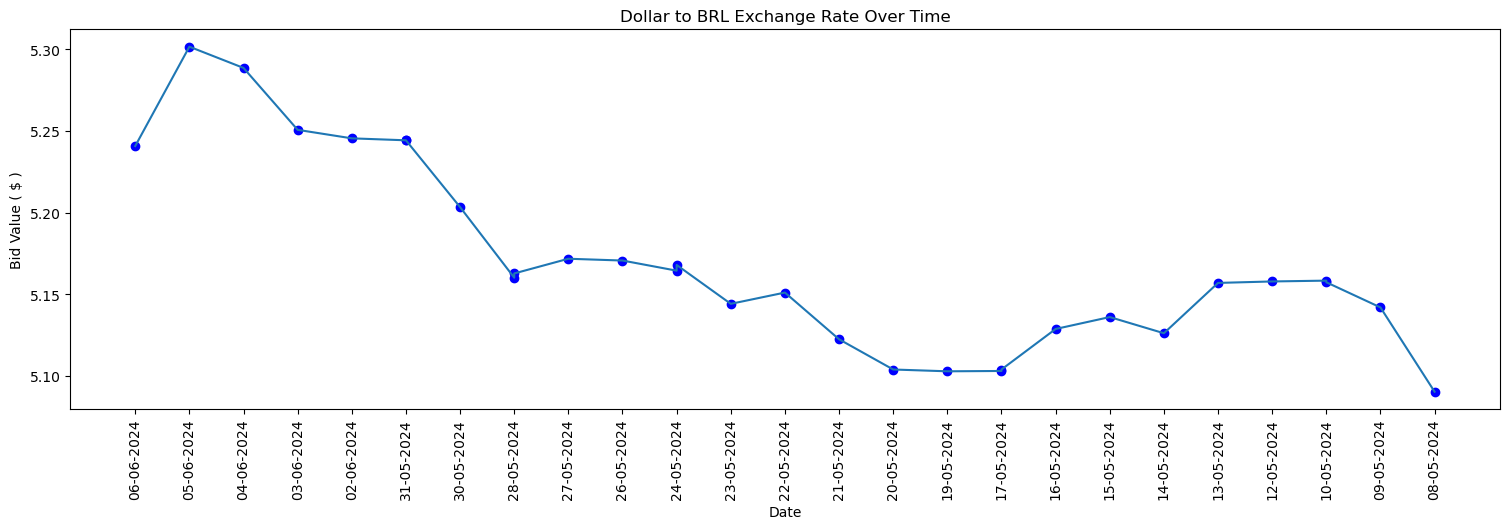

In [71]:
import matplotlib.pyplot as plt



plt.figure(figsize=(15,5))
plt.plot(lista_data_dolar,lista_cotacoes_dolar)
plt.scatter(lista_data_dolar, lista_cotacoes_dolar, color='blue')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.xlabel('Date')
plt.ylabel('Bid Value ( $ )')
plt.title('Dollar to BRL Exchange Rate Over Time')
plt.show()

#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [45]:
from datetime import datetime

# Get the data from the API
cotacoes_euro = requests.get("https://economia.awesomeapi.com.br/json/daily/EUR-BRL/100?start_date=20230606&end_date=20240605")
cotacoes_euro_dic = cotacoes_euro.json()

# Extract bid values and dates
lista_cotacoes_euro1 = [float(item['bid'])  for item in cotacoes_euro_dic]
lista_datas_euro1 = [item['timestamp'] for item in cotacoes_euro_dic]

# Reverse both lists to get the correct chronological order
lista_cotacoes_euro1.reverse()
lista_datas_euro1.reverse()

# Convert timestamp to readable date format
lista_datas_euro1 = [datetime.fromtimestamp(int(date)).strftime('%d-%m-%Y') for date in lista_datas_euro1]

# Print dates with corresponding bid values
print(lista_cotacoes_euro1)
print(lista_datas_euro1)

# Print the total number of values
print(len(lista_cotacoes_euro1))


# Print dates with corresponding bid values
for date, bid in zip(lista_datas_euro1, lista_cotacoes_euro1):
    print(f"Date: {date}, Bid: {bid}")


[5.3989, 5.3474, 5.3989, 5.346, 5.381, 5.3681, 5.367, 5.3507, 5.3683, 5.3737, 5.3844, 5.397, 5.4463, 5.3716, 5.4348, 5.4304, 5.4423, 5.4277, 5.4384, 5.4384, 5.4107, 5.4219, 5.4617, 5.4287, 5.402, 5.3969, 5.3969, 5.3554, 5.3874, 5.3915, 5.3896, 5.4065, 5.3598, 5.3598, 5.3598, 5.3598, 5.4436, 5.4579, 5.4692, 5.4832, 5.4832, 5.4561, 5.4669, 5.431, 5.4513, 5.4563, 5.4435, 5.4435, 5.3935, 5.5037, 5.5905, 5.5997, 5.5831, 5.5359, 5.5359, 5.5563, 5.5027, 5.4867, 5.5036, 5.5362, 5.4702, 5.5099, 5.4794, 5.5376, 5.5165, 5.4813, 5.4528, 5.4528, 5.4658, 5.4608, 5.4461, 5.4654, 5.5401, 5.5501, 5.5501, 5.5177, 5.5529, 5.5479, 5.5849, 5.5716, 5.5439, 5.5439, 5.5338, 5.5239, 5.549, 5.5733, 5.5677, 5.6025, 5.6025, 5.5522, 5.6119, 5.6032, 5.6232, 5.6311, 5.6947, 5.6947, 5.6208, 5.7036, 5.7476, 5.7563]
['23-02-2024', '25-02-2024', '26-02-2024', '27-02-2024', '28-02-2024', '29-02-2024', '01-03-2024', '03-03-2024', '04-03-2024', '05-03-2024', '06-03-2024', '07-03-2024', '08-03-2024', '10-03-2024', '11-03-20

#### Gráfico com as cotações do BitCoin

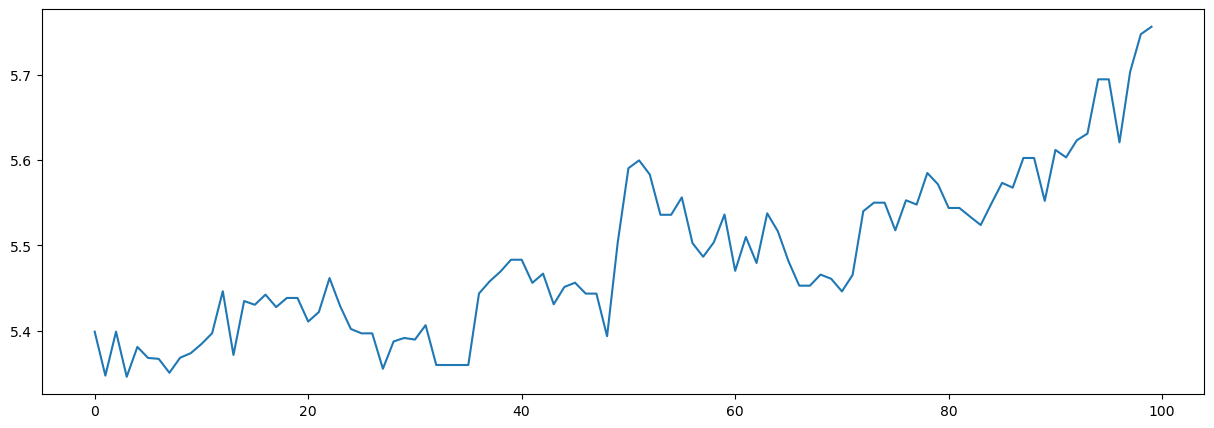

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_cotacoes_euro1)
plt.show()

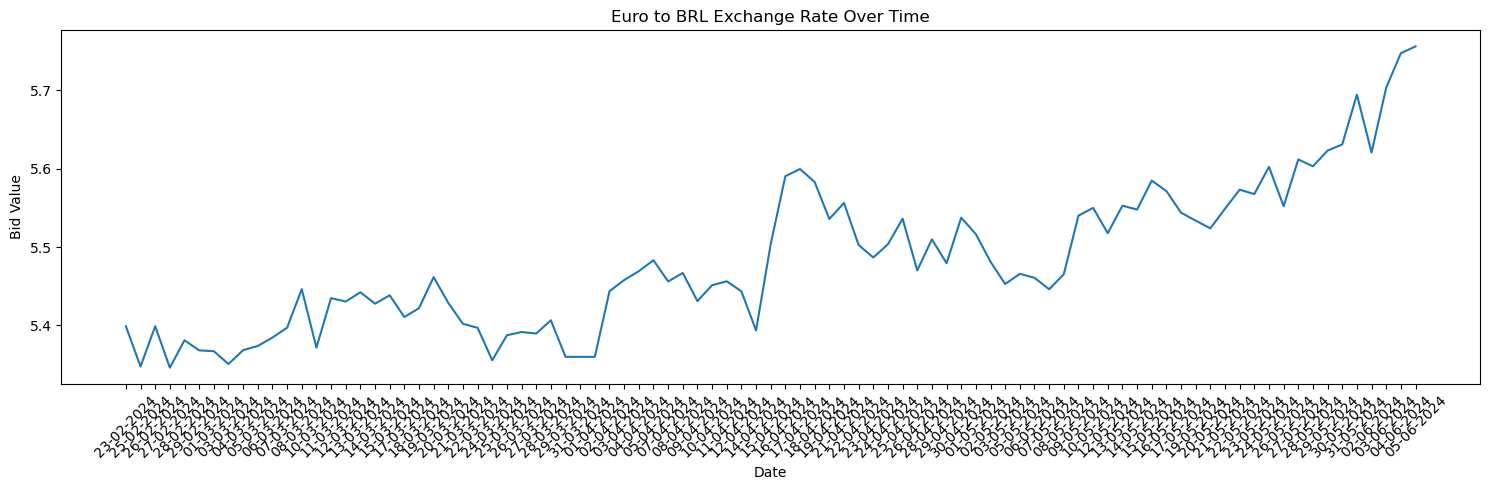

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(lista_datas_euro1, lista_cotacoes_euro1)
plt.xlabel('Date')
plt.ylabel('Bid Value')
plt.title('Euro to BRL Exchange Rate Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
